# Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D,Dropout
import freeman

**On load le dataset MNIST qui comporte 70000 images au format 28*28 pixels.
On divise le dataset avec 85 % des images pour les données d'entrainements et 15 pourcent des images pour les données de test**

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28, 1)


**on convertit les images en matrices de piexl de 0 et 1**


In [12]:
X_train = freeman.convert_binary(x_train)
X_test = freeman.convert_binary(x_test)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**On ajoute une dimension qui ne change pas les données pour pouvoir utiliser les données avec Tensorflow**

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [5]:
# Convert y_train into one-hot format 
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))

y_train = np.array(temp)

# Convert y_test into one-hot format 
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))

y_test = np.array(temp)

**Définition du modèle choisi pour le réseau :**

**-on créer deux couches successives de Convolution/Sampling avec du max pooling pour tenter de reconnaitre les patterns propre a la reconnaissance de chiffre.**

**-On va ensuite réduire en un vecteur d'une dimension les sorties résultantes du second max pooling avec la couche "flatten" pour pouvoir passer toute les entrées à la dernière couche qui n'est autre qu'un classique mlp à 10 sorties.**

In [6]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.output_shape
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

**On entraine le modèle obtenu**

In [7]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test,y_test))
# On enregistre le modèle entrainé dans un fichier pour pouvoir le réutiliser dans l'interface graphique
model.save("digit_recognition_binary.h5")

Epoch 1/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.1767 - acc: 0.9452 - val_loss: 0.0666 - val_acc: 0.9787
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0693 - acc: 0.9785 - val_loss: 0.0449 - val_acc: 0.9849
Epoch 3/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0541 - acc: 0.9830 - val_loss: 0.0447 - val_acc: 0.9852
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0439 - acc: 0.9857 - val_loss: 0.0347 - val_acc: 0.9882
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0373 - acc: 0.9881 - val_loss: 0.0455 - val_acc: 0.9850


**On test le modèle sur l'ensemble de test**

In [9]:
# Making predictions using our trained model
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

**On affiche 10 prédictions sur les images de test**

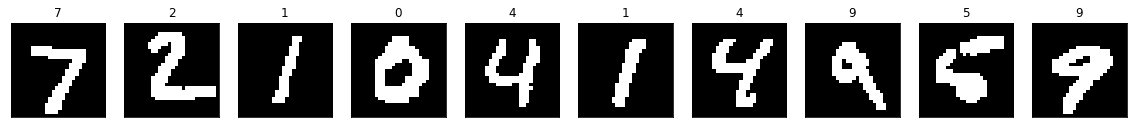

In [14]:
# On affiche 10 prédictions sur les images de test
fig, axes = plt.subplots(ncols=10, sharex=False,
			 sharey=True, figsize=(20, 4))
for i in range(10):
	axes[i].set_title(predictions[i])
	axes[i].imshow(X_test[i], cmap='gray')
	axes[i].get_xaxis().set_visible(False)
	axes[i].get_yaxis().set_visible(False)
plt.show()